In [44]:
import torch
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable

In [20]:
import scipy
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import IPython.display as display

In [146]:
rate, data = scipy.io.wavfile.read("./Data/DataSetSubSet/imAlright.wav")
data = data.mean(axis=1)

/Users/pro/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [90]:
data_1 = torch.autograd.Variable(torch.FloatTensor(data), requires_grad=False).unsqueeze(0)
print(data_1.shape)
print(data_1.size(1))

torch.Size([1, 1942186])
1942186


In [88]:
# Use the torch version to run stft() and istft() to test the reconstruction
stft = STFT()
output = stft(data_1)
print(output.shape)
output_1 = output[0][0].numpy()

torch.Size([1, 513, 3796])
torch.Size([1, 513, 3796])
torch.FloatTensor
torch.Size([1, 1, 1942186])


In [149]:
stft = STFT_1(input_data=data_1)
magp = stft()
magnitude_1, phase_1 = magp
magnitude_1 = torch.squeeze(magnitude_1)
phase_1 = torch.squeeze(phase_1)
print(magnitude_1.size())

torch.Size([1, 513, 3796])
torch.Size([1, 513, 3796])
torch.Size([513, 3796])


In [ ]:
# Play the orginal audio
display.Audio(data,rate=rate)

In [ ]:
# Play the reconstructed audio by torch version
display.Audio(output_1,rate=rate)

In [24]:
print(data.shape[0])

1942186


In [174]:
data_2 = data
f, t, Sxx = signal.stft(data_2,rate,nperseg=1024)
magnitude = np.abs(Sxx)
phase = np.unwrap(np.angle(Sxx),axis=-2)
# print(t)
# print(f)
print(magnitude)

[[1.61068259e+02 1.60508172e+01 9.29114790e+01 ... 2.14534381e+02
  1.69039310e+02 3.90268789e+00]
 [2.45488185e+02 5.16969124e+02 5.05813697e+02 ... 5.85442623e+02
  3.37787741e+02 3.95706776e+00]
 [2.70168697e+02 7.93132229e+02 6.77045150e+02 ... 3.75030441e+02
  5.32040954e+02 4.08074509e+00]
 ...
 [1.83022340e+00 1.09273965e+00 8.13308962e-01 ... 1.41708722e-01
  1.63991984e+00 5.90010213e-01]
 [6.91212972e-01 1.38756453e+00 7.19100270e-01 ... 1.91390471e-01
  1.68346940e+00 5.85370999e-01]
 [3.28254321e-01 8.43257621e-01 9.90831586e-01 ... 3.49763067e-03
  1.80412058e+00 5.83680728e-01]]


In [140]:
magnitude_2 = torch.from_numpy(np.expand_dims(magnitude, axis=0))
phase_2 = torch.from_numpy(np.expand_dims(phase, axis=0))
print(magnitude_2.shape)
print(phase_2.shape)
magnitude_2 = magnitude_2.float()
phase_2 = phase_2.float()
print(magnitude_2.type())
print(magnitude_2.size)

torch.Size([1, 1, 513, 3796])
torch.Size([1, 513, 3795])
torch.FloatTensor
<built-in method size of Tensor object at 0x11f5d6bd0>


In [175]:
data_3 = torch.autograd.Variable(torch.FloatTensor(data_2), requires_grad=False).unsqueeze(0)
np.save("./Data/Data_Store/imAlright/size",data_3.size(1))
size = np.load("./Data/Data_Store/imAlright/size.npy")
np.save("./Data/Data_Store/imAlright/magnitude",magnitude_1)
magnitude = np.load("./Data/Data_Store/imAlright/magnitude.npy")
np.save("./Data/Data_Store/imAlright/phase",phase_1)
phase = np.load("./Data/Data_Store/imAlright/phase.npy")
print(magnitude.shape)
magnitude_2 = torch.from_numpy(np.expand_dims(magnitude, axis=0))
phase_2 = torch.from_numpy(np.expand_dims(phase, axis=0))
print(magnitude_2.shape)
print(phase_2.shape)
magnitude_2 = magnitude_2.float()
phase_2 = phase_2.float()
print(magnitude_2.type())
print(magnitude_2.size)

(513, 3796)
torch.Size([1, 513, 3796])
torch.Size([1, 513, 3796])
torch.FloatTensor
<built-in method size of Tensor object at 0x11f5d6bd0>


In [176]:
# Use the scipy stft() and torch istft() to test the reconstruction
data_4 = torch.autograd.Variable(torch.FloatTensor(data_2), requires_grad=False).unsqueeze(0)
print(data_4.size(1))
# stft = STFT_1(size=data_2.size(1), magnitude=magnitude_2, phase=phase_2)
stft = STFT_1(size=size, magnitude=magnitude_2, phase=phase_2)
test = stft(inv=True)
print(test.shape)
print(test[0][0].type())
test_1 = test[0][0].numpy()
print(test_1)

1942186
torch.Size([1, 1, 1942186])
torch.FloatTensor
[-2825.     -2477.9995 -1256.9999 ... -2965.5005 -2402.5    -2348.0005]


In [28]:
# Play the reconstructed audio by scipy and torch combined version
display.Audio(test_1,rate=rate)

# Compare the reconstructed audios with the orginal 

In [177]:
trueWav = data_1.numpy()
trueWavNorm = data_2.numpy()
reConWav_torch = output_1
reConWav_combined = test_1

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [178]:
print(trueWavNorm)
print(trueWav)
diff = trueWavNorm - reConWav_combined
diff_1 = trueWav - reConWav_torch
print('MSE for torch version: %s' % (str((np.linalg.norm(diff_1)))))
print('MSE for combined version: %s' % (str((np.linalg.norm(diff)))))

[[-2825.  -2478.  -1257.  ... -2965.5 -2402.5 -2348. ]]
[[-2825.  -2478.  -1257.  ... -2965.5 -2402.5 -2348. ]]
MSE for torch version: 0.962376
MSE for combined version: 0.962376


0.962376 0.005859375 -0.005859375


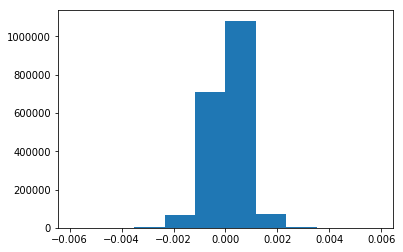

0.962376 0.005859375 -0.005859375


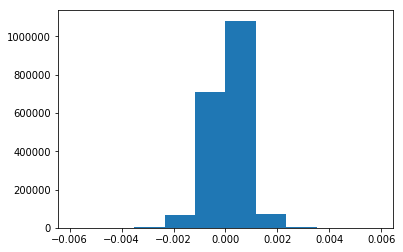

In [112]:
print(np.linalg.norm(diff), diff.max(), diff.min())
plt.figure()
plt.hist(diff.flatten())
plt.show()

print(np.linalg.norm(diff_1), diff_1.max(), diff_1.min())
plt.figure()
plt.hist(diff_1.flatten())
plt.show()

In [17]:
class STFT(torch.nn.Module):
    def __init__(self, filter_length=1024, hop_length=512):
        super(STFT, self).__init__()

        self.filter_length = filter_length
        self.hop_length = hop_length
        self.forward_transform = None
        scale = self.filter_length / self.hop_length
        fourier_basis = np.fft.fft(np.eye(self.filter_length))

        cutoff = int((self.filter_length / 2 + 1))
        fourier_basis = np.vstack([np.real(fourier_basis[:cutoff, :]),
                                   np.imag(fourier_basis[:cutoff, :])])
        forward_basis = torch.FloatTensor(fourier_basis[:, None, :])
        inverse_basis = torch.FloatTensor(np.linalg.pinv(scale * fourier_basis).T[:, None, :])

        self.register_buffer('forward_basis', forward_basis.float())
        self.register_buffer('inverse_basis', inverse_basis.float())

    def transform(self, input_data):
        num_batches = input_data.size(0)
        num_samples = input_data.size(1)

        self.num_samples = num_samples

        input_data = input_data.view(num_batches, 1, num_samples)
        forward_transform = F.conv1d(input_data,
                                     Variable(self.forward_basis, requires_grad=False),
                                     stride = self.hop_length,
                                     padding = self.filter_length)
        cutoff = int((self.filter_length / 2) + 1)
        real_part = forward_transform[:, :cutoff, :]
        imag_part = forward_transform[:, cutoff:, :]

        magnitude = torch.sqrt(real_part**2 + imag_part**2)
        phase = torch.autograd.Variable(torch.atan2(imag_part.data, real_part.data))
        print(magnitude.shape)
        print(phase.shape)
        return magnitude, phase

    def inverse(self, magnitude, phase):
        recombine_magnitude_phase = torch.cat([magnitude*torch.cos(phase),
                                               magnitude*torch.sin(phase)], dim=1)

        inverse_transform = F.conv_transpose1d(recombine_magnitude_phase,
                                               Variable(self.inverse_basis, requires_grad=False),
                                               stride=self.hop_length,
                                               padding=0)
        inverse_transform = inverse_transform[:, :, self.filter_length:]
        inverse_transform = inverse_transform[:, :, :self.num_samples]
        return inverse_transform

    def forward(self, input_data):
        self.magnitude, self.phase = self.transform(input_data)
        print(self.magnitude.type())
        reconstruction = self.inverse(self.magnitude, self.phase)
        return reconstruction

In [83]:
class STFT_1(torch.nn.Module):
    def __init__(self, filter_length=1024, hop_length=512, **kwargs):
        super(STFT_1, self).__init__()
        self.input_data = kwargs.get('input_data')
        self.size = kwargs.get('size')
        self.magnitude = kwargs.get('magnitude')
        self.phase = kwargs.get('phase')
        self.inv = kwargs.get('inv')
        self.filter_length = filter_length
        self.hop_length = hop_length
        self.forward_transform = None
        scale = self.filter_length / self.hop_length
        fourier_basis = np.fft.fft(np.eye(self.filter_length))

        cutoff = int((self.filter_length / 2 + 1))
        fourier_basis = np.vstack([np.real(fourier_basis[:cutoff, :]),
                                   np.imag(fourier_basis[:cutoff, :])])
        forward_basis = torch.FloatTensor(fourier_basis[:, None, :])
        inverse_basis = torch.FloatTensor(np.linalg.pinv(scale * fourier_basis).T[:, None, :])

        self.register_buffer('forward_basis', forward_basis.float())
        self.register_buffer('inverse_basis', inverse_basis.float())

    def transform(self, input_data):
            num_batches = input_data.size(0)
            num_samples = input_data.size(1)

            self.num_samples = num_samples

            input_data = input_data.view(num_batches, 1, num_samples)
            forward_transform = F.conv1d(input_data,
                                         Variable(self.forward_basis, requires_grad=False),
                                         stride = self.hop_length,
                                         padding = self.filter_length)
            cutoff = int((self.filter_length / 2) + 1)
            real_part = forward_transform[:, :cutoff, :]
            imag_part = forward_transform[:, cutoff:, :]

            magnitude = torch.sqrt(real_part**2 + imag_part**2)
            phase = torch.autograd.Variable(torch.atan2(imag_part.data, real_part.data))
            print(magnitude.shape)
            print(phase.shape)
            return magnitude, phase

    def inverse(self, magnitude, phase):
        num_samples = self.size
        self.num_samples = num_samples
        recombine_magnitude_phase = torch.cat([magnitude*torch.cos(phase),
                                               magnitude*torch.sin(phase)], dim=1)

        inverse_transform = F.conv_transpose1d(recombine_magnitude_phase,
                                               Variable(self.inverse_basis, requires_grad=False),
                                               stride=self.hop_length,
                                               padding=0)
        inverse_transform = inverse_transform[:, :, self.filter_length:]
        inverse_transform = inverse_transform[:, :, :self.num_samples]
        return inverse_transform

    def forward(self, inv=False):
        if (inv):
            result = self.inverse(self.magnitude, self.phase)
        else:
            result = self.transform(self.input_data)
        return result